In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns   
import math

In [2]:
infori = pd.read_csv('data/winequality-red.csv')

In [3]:
infori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
infori.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# interpret each of value of the qualities as a class
# and factor each of the feature as independent

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

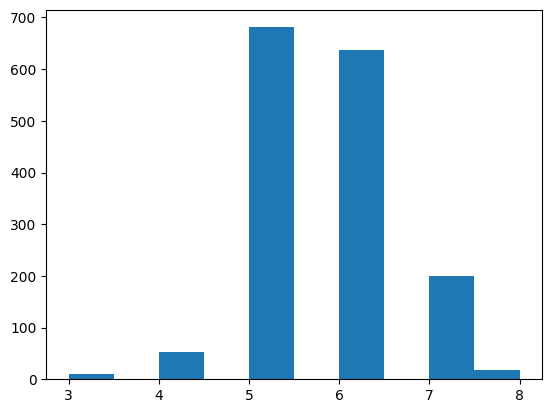

In [6]:
plt.hist(infori['quality'])

In [7]:
from sklearn.model_selection import train_test_split

inf, X_test, y_train, y_test = train_test_split(infori, infori['quality'], test_size=0.25, random_state=0)

In [8]:
# Create artificial column for quality
inf['q_3'] = inf['quality'] == 3
inf['q_4'] = inf['quality'] == 4
inf['q_5'] = inf['quality'] == 5
inf['q_6'] = inf['quality'] == 6
inf['q_7'] = inf['quality'] == 7
inf['q_8'] = inf['quality'] == 8

In [9]:
(inf['quality'] > 8).sum() + (inf['quality'] < 3).sum()

0

In [10]:
# perform previous example on this column basically

In [11]:
allY = inf[['q_3', 'q_4', 'q_5', 'q_6', 'q_7', 'q_8']]

In [15]:
# eqn changes a little bit to
# p(x) = 1/(1 + e^-(b0 + b1x1 + b2x2 ... bnxn)
# also we will need standardize all the x0...xns

def get_lin_eqn(params, xs):
    return np.dot(params, np.concatenate(([1], xs)))

def get_p(params, xs):
    return 1/(1 + math.e**-(np.sum(get_lin_eqn(params, xs))))

def get_all_p(params, ds):
    return ds.apply(lambda x: get_p(params, np.array(x)[:11]), axis=1)

def errfuncBN(ypr, y, x=1):
    return ((ypr - y) * x).mean()

def get_fit(params, ds):
    return (Y * get_all_p(params, ds).apply(lambda x: math.log(x)) + Y.apply(lambda x: 1 - x) * get_all_p(params, ds).apply(lambda x: math.log(1 - x))).sum()

def get_cost(params, ds):
    return - get_fit(params, ds) / Y.count()

In [16]:
inf[inf.columns[0]]

140     0.035686
1232   -0.425017
720     0.035686
77     -0.885720
39     -0.597781
          ...   
763     0.553977
835    -0.425017
1216   -0.252253
559     2.684730
684     0.841917
Name: fixed acidity, Length: 1199, dtype: float64

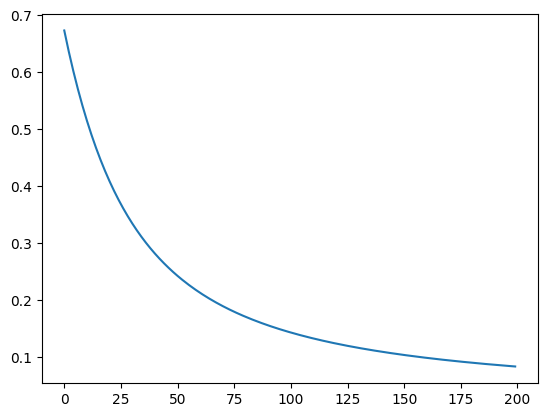

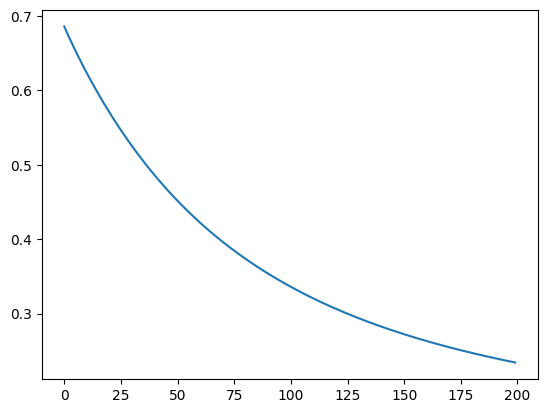

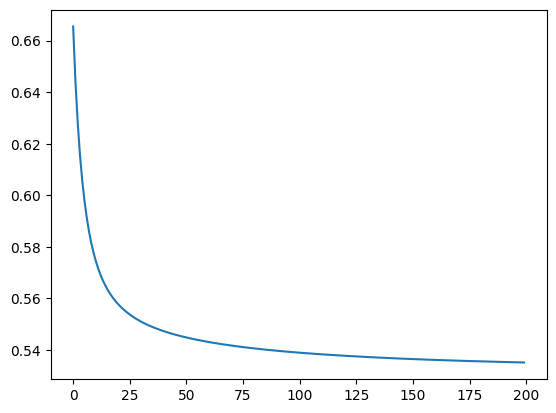

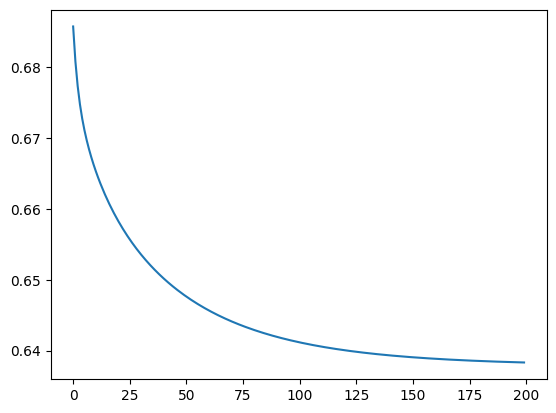

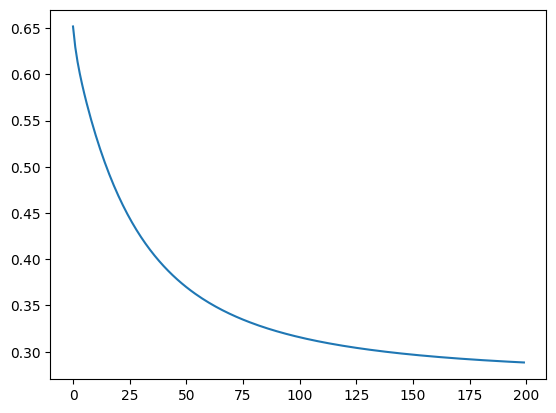

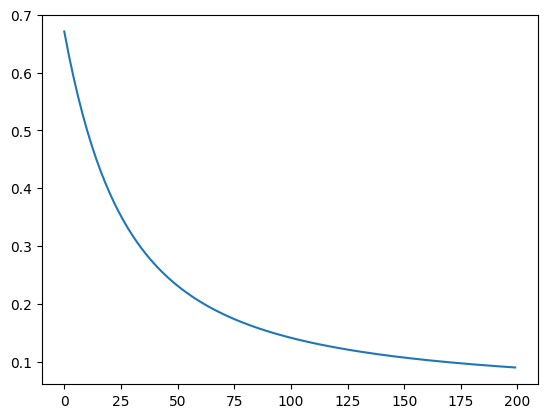

In [49]:
for i in range(0, 11):
    t3 = inf.columns[i]
    inf[t3] = (inf[t3] - inf[t3].mean()) / inf[t3].std()

params_all = []
alphas_all = [0.8, 0.3, 0.3, 0.5, 0.9, 0.9]
i0 = 0
for t2 in allY.columns:
    Y = allY[t2]
    params = np.zeros(11 + 1)
    alpha = alphas_all[i0]
    costs = []
    fig, ax = plt.subplots()
    for i in range(200):
        #generate ypr
        ypr = get_all_p(params, inf)
        for idx, x in np.ndenumerate(params):
            if idx == 0:
                params[0] = x - alpha * errfuncBN(ypr, Y)
            else:
                params[idx] = x - alpha * errfuncBN(ypr, Y, inf[inf.columns[idx[0] - 1]])
        rm = get_cost(params, inf)
        costs.append(rm)
    inf['p_' + t2] = get_all_p(params, inf)
    params_all.append(params)
    ax.plot(costs)
    i0 += 1

In [19]:
# descent looks good
# Now do this for every class and assign a class number 
# according to probability

In [50]:
inf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,q_5,q_6,q_7,q_8,p_q_3,p_q_4,p_q_5,p_q_6,p_q_7,p_q_8
140,0.035686,1.169651,-0.827626,-0.445166,0.057612,-0.012491,0.459672,-0.136860,-0.770363,0.911572,...,True,False,False,False,0.074748,0.190042,0.606875,0.322612,0.051407,0.055586
1232,-0.425017,-0.547120,0.097474,-0.309833,-0.254013,0.270093,0.547912,0.224689,0.590541,-0.106043,...,True,False,False,False,0.056939,0.156309,0.678988,0.331227,0.069530,0.050220
720,0.035686,0.161388,-1.187388,-0.377500,-0.108588,-0.577660,-0.746275,0.447998,-0.575948,-1.236726,...,True,False,False,False,0.068147,0.164618,0.648953,0.462714,0.035981,0.047816
77,-0.885720,1.387654,-1.392965,-0.106833,0.348462,-0.200881,-0.510968,-0.083691,1.368200,-0.614850,...,False,True,False,False,0.096450,0.226754,0.495054,0.408042,0.047327,0.052391
39,-0.597781,-0.438119,0.457235,2.261498,-0.274788,-0.389271,1.165593,0.554336,0.136907,0.968106,...,True,False,False,False,0.054466,0.149880,0.447011,0.301794,0.193028,0.065312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.553977,0.679145,-0.056710,-0.377500,0.182262,-1.048634,-0.363901,0.331027,-0.381533,-1.349794,...,True,False,False,False,0.079813,0.198956,0.748526,0.267347,0.034794,0.047862
835,-0.425017,0.733646,-0.879021,-0.715833,-0.440988,1.023652,0.224366,-0.110276,0.525736,-0.840987,...,True,False,False,False,0.074932,0.194829,0.748135,0.329112,0.028650,0.045732
1216,-0.252253,0.215889,0.200263,-0.377500,-0.170913,-0.577660,0.930286,0.006696,-0.122313,0.176628,...,False,True,False,False,0.061289,0.168179,0.763813,0.228671,0.052121,0.053546
559,2.684730,-0.329118,1.125363,1.178833,-0.046263,-0.954440,-0.010941,2.840602,-0.057508,0.120094,...,False,True,False,False,0.068233,0.148156,0.103356,0.574728,0.411386,0.069663


In [51]:
def sortacctoprob(x):
    nm = x[['p_q_3', 'p_q_4', 'p_q_5', 'p_q_6', 'p_q_7', 'p_q_8']].idxmax()
    return int(nm[4])

In [52]:
ypred = inf.apply(sortacctoprob, axis=1)

In [53]:
ypred.describe()

count    1199.000000
mean        5.520434
std         0.597190
min         5.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         7.000000
dtype: float64

In [54]:
inf['quality']

140     5
1232    5
720     5
77      6
39      5
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1199, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
accuracy_score(inf['quality'], ypred)

0.585487906588824

In [33]:
# 50% is poor, maybe if we normalized x axis values?
# After normalization we have 55% little better
# Test model with X_test, and y_test
# Use params to calculate P for all category

In [56]:
out = pd.DataFrame()
out['quality'] = y_test
i = 3
for params in params_all:
    ypr = get_all_p(params, X_test)
    out['p_q_' + str(i)] = ypr
    i +=1

In [57]:
ypred2 = out.apply(sortacctoprob, axis=1)

In [58]:
accuracy_score(y_test, ypred2)

0.365

In [59]:
inf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'q_3', 'q_4', 'q_5', 'q_6',
       'q_7', 'q_8', 'p_q_3', 'p_q_4', 'p_q_5', 'p_q_6', 'p_q_7', 'p_q_8'],
      dtype='object')

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(inf[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']], 
           y_train)


LogisticRegression()

In [71]:
y_pred4 = logreg.predict(X_test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']])

In [73]:
accuracy_score(y_test, y_pred4)

0.3525

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
confusion_matrix(y_test, y_pred4)

array([[  0,   0,   1,   0,   1,   0],
       [  0,   0,   5,   0,   9,   0],
       [  0,   0, 117,   0,  52,   0],
       [  0,   0, 102,   0,  68,   0],
       [  0,   0,  16,   0,  24,   0],
       [  0,   0,   2,   0,   3,   0]])

In [83]:
classification_report(y_test, y_pred4)

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         2\n           4       0.00      0.00      0.00        14\n           5       0.48      0.69      0.57       169\n           6       0.00      0.00      0.00       170\n           7       0.15      0.60      0.24        40\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.35       400\n   macro avg       0.11      0.22      0.14       400\nweighted avg       0.22      0.35      0.26       400\n'